In [1]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from psffit.task import Match_Mask_Measure, Run_PSF_Fitting
from psffit.plotting import AsinhNorm, LogNorm

In [3]:
header = fits.getheader('/home/qliu/Desktop/PSF/data/NGC4565/NGC4565_g_cutout_pcp_pcr.fits')
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1351                                                  NAXIS2  =                 1351                                                  ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        DATE    = '2019-03-07T19:10:01' / Date FITS file was generated                  IRAF-TLM= '2019-03-07T19:10:01' / Time of last modification                     CTYPE1  = 'RA---TAN'                                                            CRPIX1  =                676.5                                                  CRVAL1  =       189.0866666667                                                  CTYPE2  = 'DEC--TAN'                                                            CRPIX2  =                676.5          

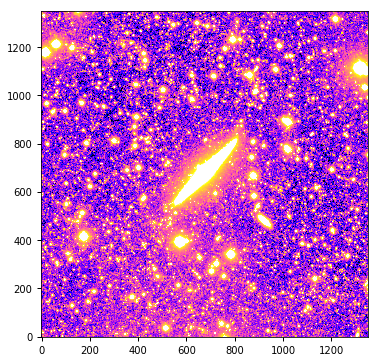

In [4]:
hdu = fits.open('/home/qliu/Desktop/PSF/data/NGC4565/NGC4565_g_cutout.fits')[0]

plt.figure(figsize=(6,6))
data = hdu.data
plt.imshow(data, vmin=715, vmax=760, norm=AsinhNorm(a=0.01))

## Object Masking

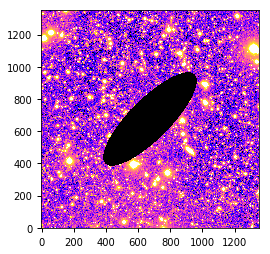

In [8]:
from src.mask import make_mask_aperture

# object mask shape
pos = (data.shape[1]-1)/2., (data.shape[0]-1)/2.
a_ang, b_ang, PA_ang = 325.6, 104.2, 135

# make mask
mask_galaxy = make_mask_aperture(pos, a_ang, b_ang, PA_ang, data.shape,
                                 k=3, pixel_scale=2.5)

plt.figure(figsize=(4,4))
plt.imshow(data*(1-mask_galaxy), vmin=715, vmax=760, norm=AsinhNorm(a=0.01))

# save mask map
from astropy.io import fits
fits.writeto('NGC4565-g_maskobj.fits', mask_galaxy)

## File Path and Bounds

In [5]:
# Work Path
work_dir = "/home/qliu/Desktop/PSF"
fname = 'NGC4565_g_cutout'

# Input Path
hdu_path = os.path.join(work_dir, "data/NGC4565/%s.fits"%fname)
SE_segmap = os.path.join(work_dir, "SE_APASS/%s_seg.fits"%fname)
SE_catalog = os.path.join(work_dir, "SE_APASS/%s.cat"%fname)

# Output Path
dir_name = os.path.join(work_dir, 'psf_modeling/output/Measure-PS')

# Image Bounds
image_bounds0 = ((0,0,data.shape[0]//2*2,data.shape[1]//2*2))

## Match & Measure

Measure the intensity at R = 12 for stars < 15.0
            as normalization of fitting

Read Image : /home/qliu/Desktop/PSF/data/NGC4565/NGC4565_g_cutout.fits
BACKVAL: 717.63 +/- 1.78 , ZP: 27.30

Measure Sky Patch (X min, Y min, X max, Y max) :
[0, 0, 1350, 1350]


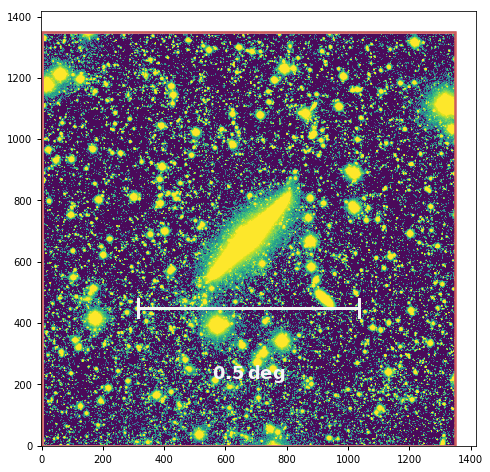

Search 0.663 deg around:
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (189.08705294, 25.98704167)>
Matched stars with PANSTARRS DR2 gMeanPSFMag:  8.896 ~ 22.399
Matched bright stars with PANSTARRS DR2 gMeanPSFMag:  8.896 ~ 14.984

Average Color Term [SE-catalog] = 0.00122


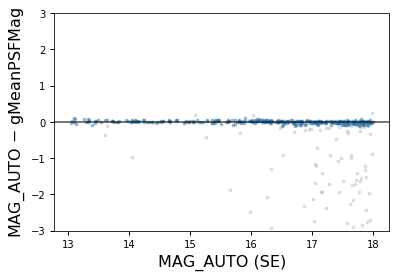

Save PANSTARRS catalog & matched sources in /home/qliu/Desktop/PSF/psf_modeling/output/Measure-PS

Fit 3-order empirical relation of aperture radii for catalog stars based on SE (X2.5)


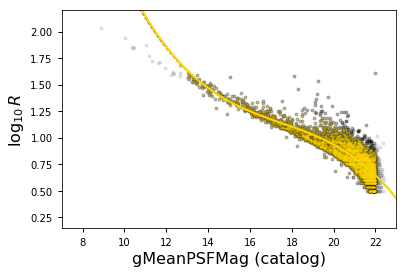


Make segmentation map based on catalog PS gMeanPSFMag: 12334 stars


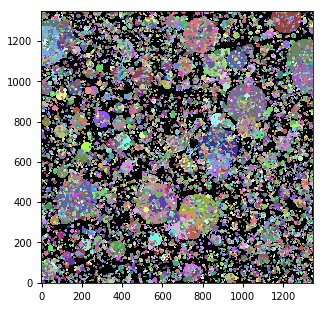

Save segmentation map made from catalog as /home/qliu/Desktop/PSF/psf_modeling/output/Measure-PS/NGC4565-segm_gmag_catalog_X0Y0.fits

Measure intensity at R = 12
                for catalog stars gMeanPSFMag < 15.0 in array([   0,    0, 1350, 1350]):
completed: 22/89
completed: 44/89
completed: 66/89
Errorenous measurement: # 599
completed: 88/89
Save thumbs to: /home/qliu/Desktop/PSF/psf_modeling/output/Measure-PS/NGC4565-thumbnail_gmag15_X0Y0.pkl


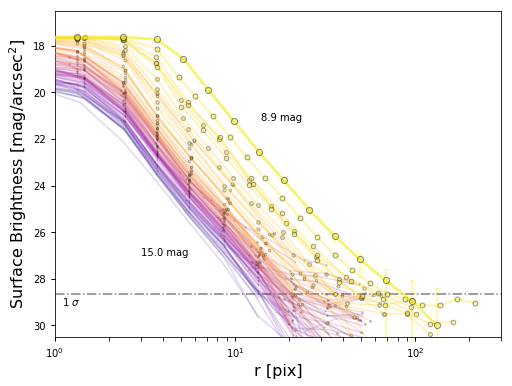

In [6]:
Match_Mask_Measure(hdu_path, image_bounds0,
                   SE_segmap, SE_catalog, 
                   obj_name='NGC4565', band='G',
                   field_pad=0, ZP=27.299,
                   use_PS1_DR2=True, dir_name=dir_name)

## Fitting

Magnitude Thresholds:  14, 11.5 mag
(<=> Flux Thresholds: 208737.27, 2087372.7 ADU)
# of medium bright (flux:2.2e+05~1.9e+06) stars: 42 
# of very bright (flux>2.8e+06) stars : 7
Not many bright stars, will draw in serial.

Read mask map of objects:  /home/qliu/Desktop/PSF/psf_modeling/notebook/NGC4565_maskobj.fits
Read mask map built from catalog:  ../output/Measure-PS/NGC4565-segm_gmag_catalog_X0Y0.fits
Detect and deblend source... Mask S/N > 3.0 (3th enlarged)
Mask core regions: r < 16 (16) pix 


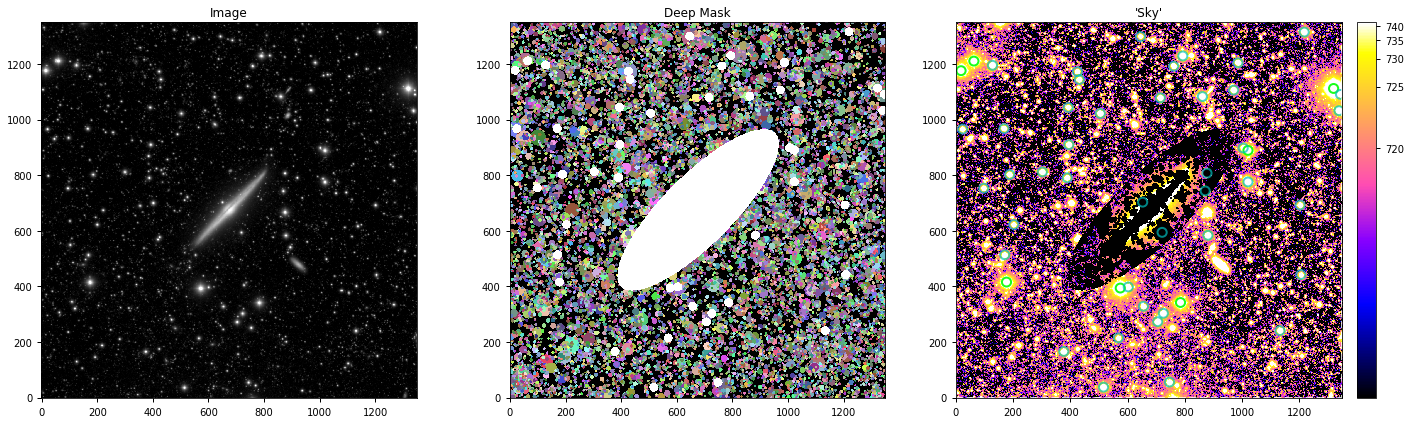

Use sky strips crossing very bright stars


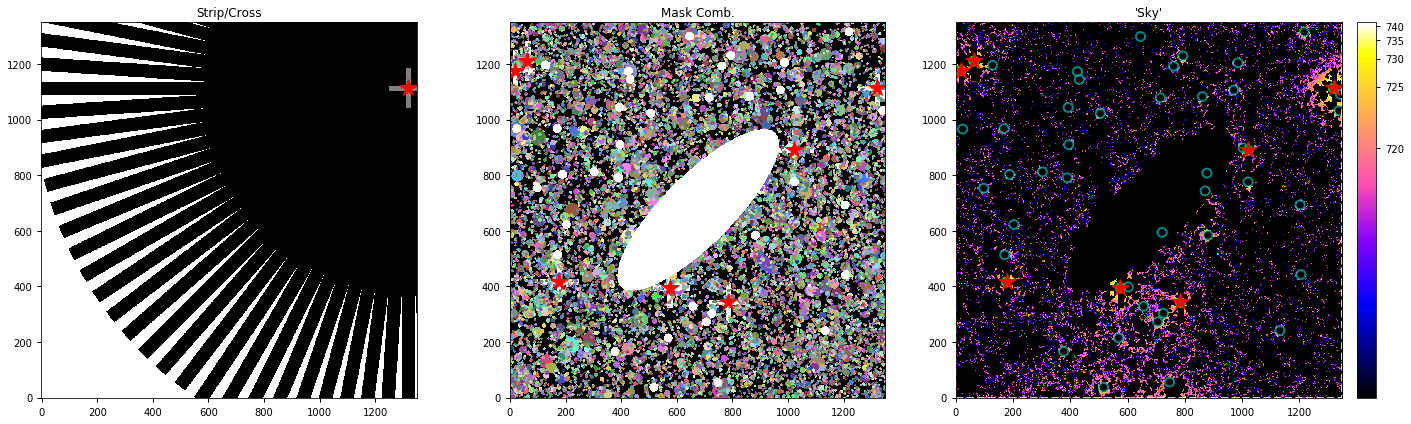

Is the Mask Reasonable?[y/n] y


Image[   0    0 1350 1350]
Estimate of Background: (717.309 +/- 1.252)

Opening new pool: # of CPU used: 3
Run Nested Fitting for the image... Dim of params: 7


iter: 2645 | batch: 2 | bound: 86 | nc: 1 | ncall: 10911 | eff(%): 24.242 | loglstar: -1017278.766 <   -inf < -1017276.853 | logz:   -inf +/-  0.921 | stop:  5.132                                   



Finish Fitting! Total time elapsed: 5.99e+03 s

Pool Closed.


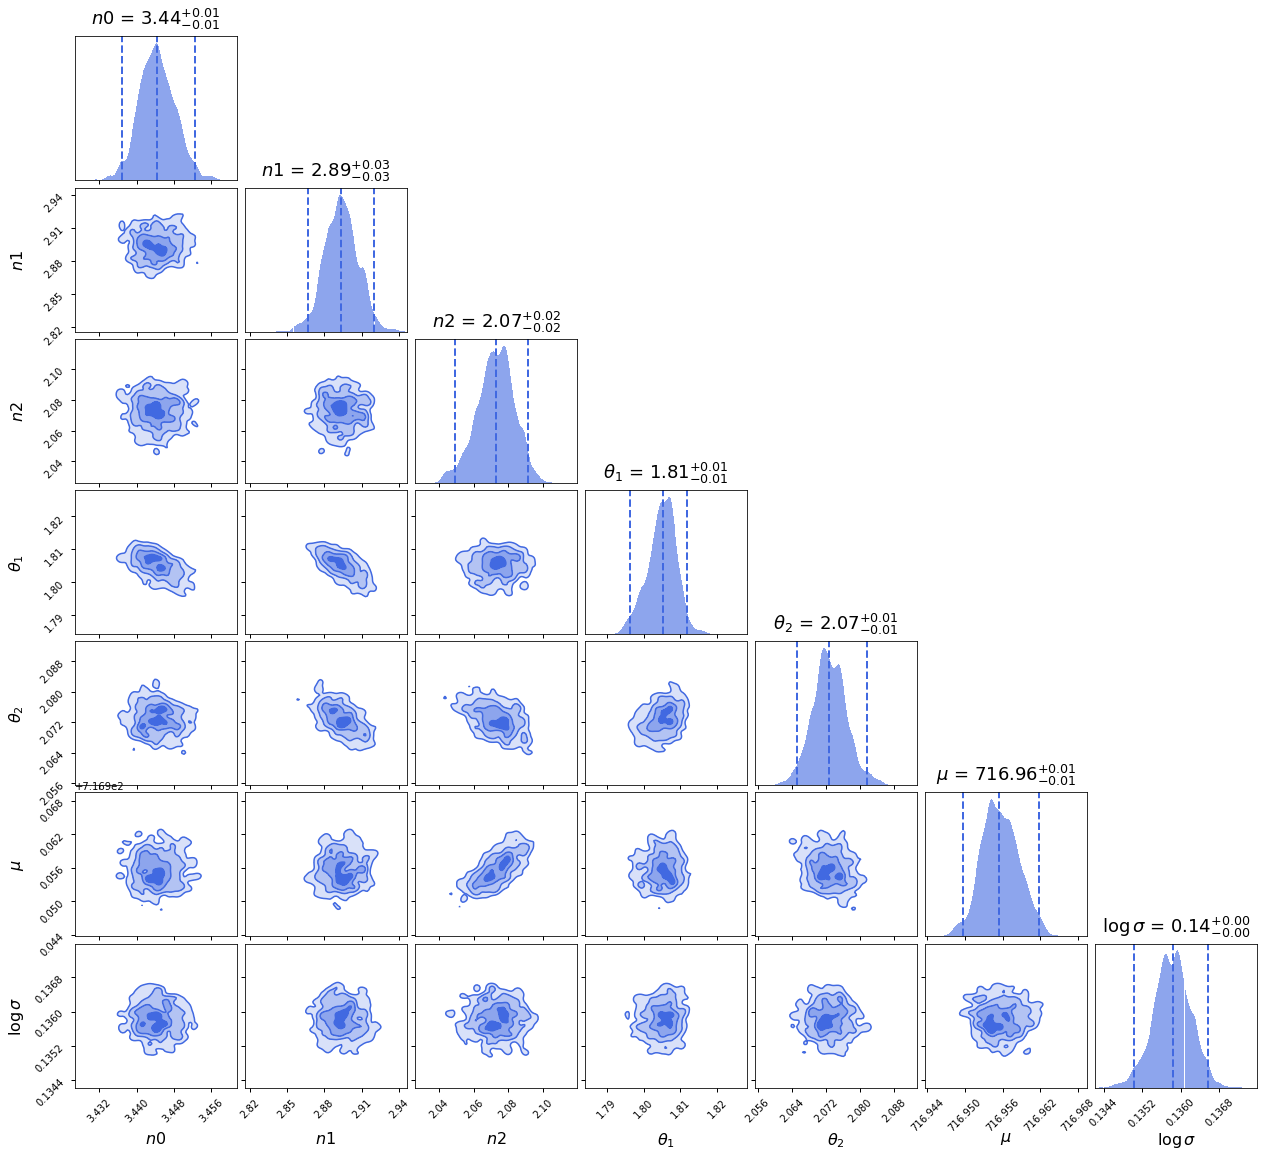

Fitting (mean) :  [3.44400e+00 2.89400e+00 2.07300e+00 1.80500e+00 2.07300e+00 7.16956e+02
 1.36000e-01]
Fitting (median) :  [3.44400e+00 2.89400e+00 2.07300e+00 1.80500e+00 2.07300e+00 7.16956e+02
 1.36000e-01]
Bakground : 716.96 +/- 1.37
Reduced Chi^2: 1.00583


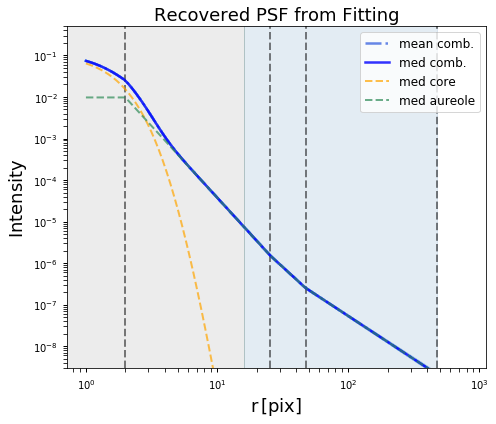

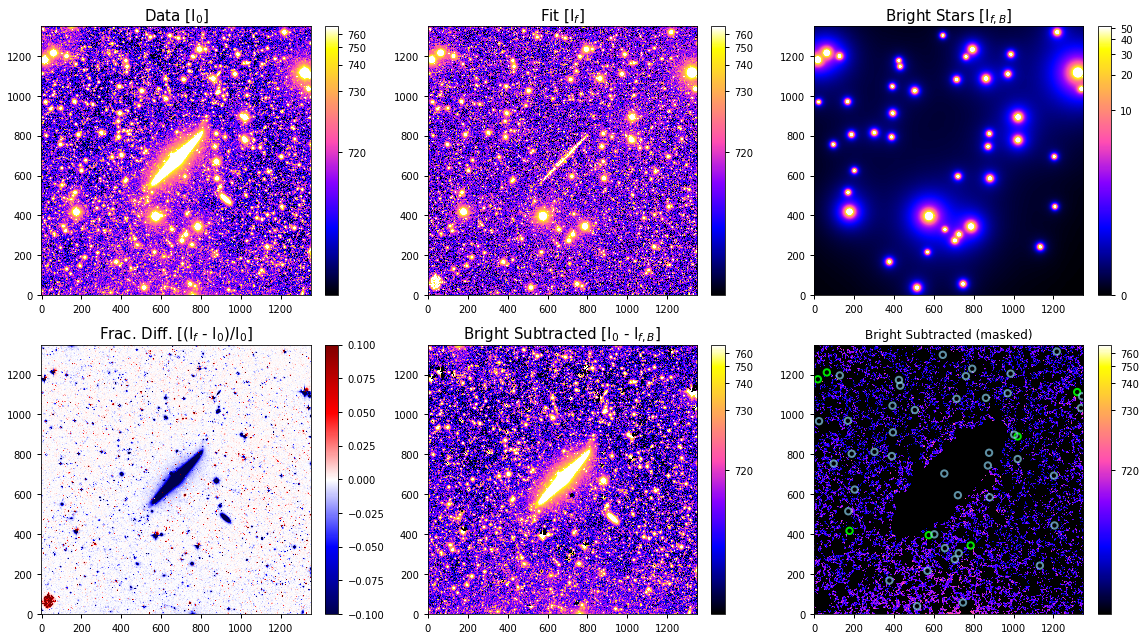

In [7]:
sampler = Run_PSF_Fitting(hdu_path, image_bounds0,
                          obj_name='NGC4565', band='G',
                          n_spline=3, r_core=16, ZP=27.299,
                          mag_threshold=[14,11.5], pad=0)